# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_ids = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()

clean_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mouse_ids)]

clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data["Mouse ID"].nunique()
num_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_statsadv = clean_data.groupby("Drug Regimen").agg(
    Mean=("Tumor Volume (mm3)", "mean"),
    Median=("Tumor Volume (mm3)", "median"),
    Variance=("Tumor Volume (mm3)", "var"),
    Std_Dev=("Tumor Volume (mm3)", "std"),
    SEM=("Tumor Volume (mm3)", "sem")
)
# Using the aggregation method, produce the same summary statistics in a single line
summary_statsadv


,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

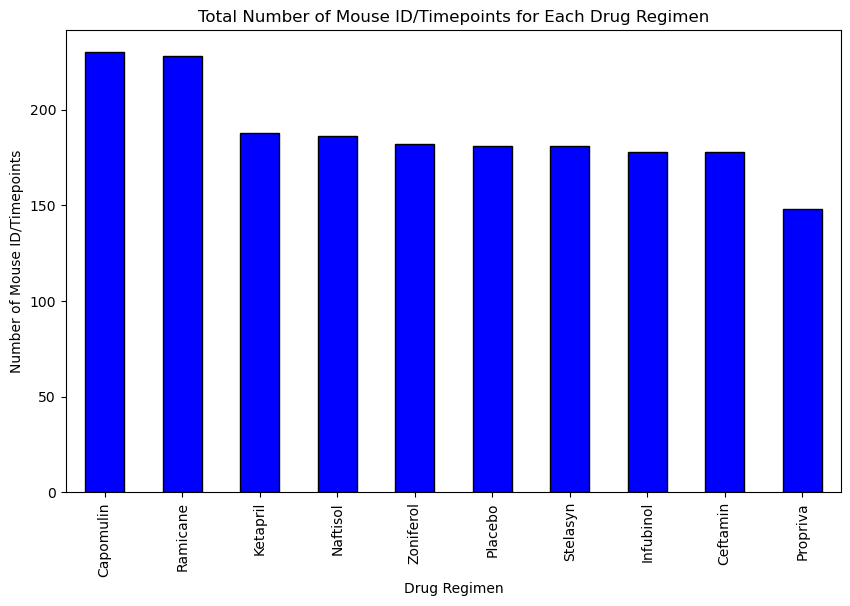

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data["Drug Regimen"].value_counts()

regimen_counts.plot(kind="bar", color="blue", edgecolor="black", figsize=(10, 6))

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")

plt.show()



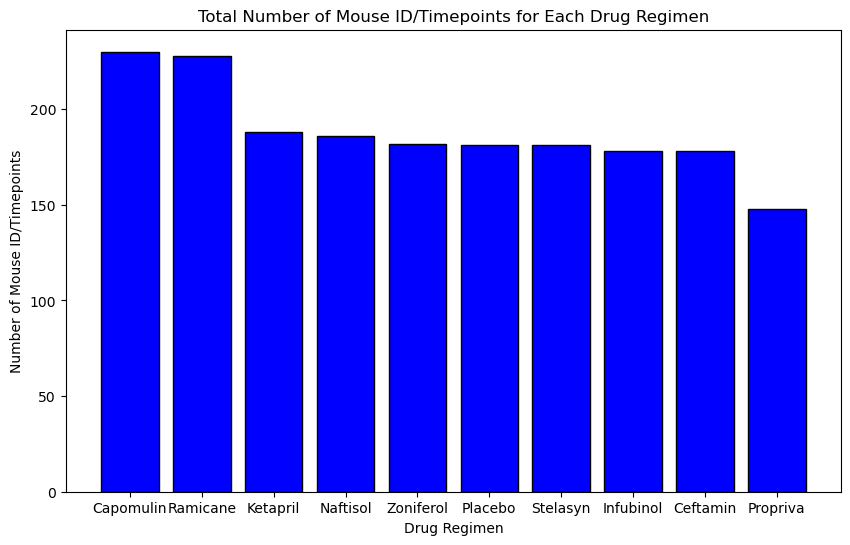

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_data["Drug Regimen"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color="blue", edgecolor="black")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")

plt.show()

In [11]:
regimen_counts


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

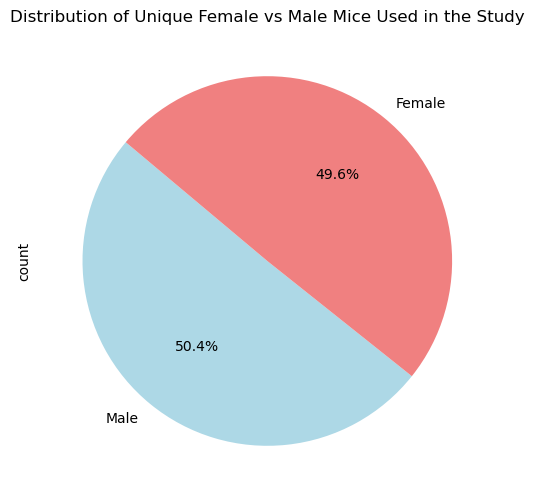

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = clean_data.drop_duplicates(subset="Mouse ID")[["Mouse ID", "Sex"]]

# Get the unique mice with their gender
gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["lightblue", "lightcoral"], figsize=(6, 6))

plt.title("Distribution of Unique Female vs Male Mice Used in the Study")

plt.show()

In [13]:

gender_counts


Sex
Male      125
Female    123
Name: count, dtype: int64

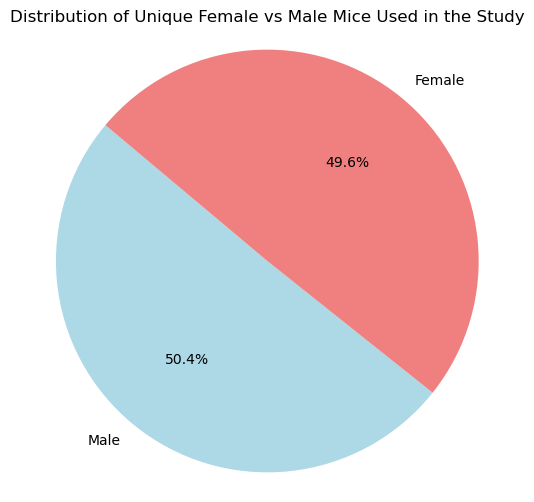

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice = clean_data.drop_duplicates(subset="Mouse ID")[["Mouse ID", "Sex"]]



# Get the unique mice with their gender
gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=140, colors=["lightblue", "lightcoral"])

plt.title("Distribution of Unique Female vs Male Mice Used in the Study")

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby("Mouse ID").agg({"Timepoint": "max"}).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volumes = pd.merge(last_timepoints, clean_data, on=["Mouse ID", "Timepoint"])

treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volumes = last_tumor_volumes[last_tumor_volumes["Drug Regimen"].isin(treatment_regimens)]

final_tumor_volumes[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
3,a275,Ceftamin,45,62.999356
6,a411,Ramicane,45,38.407618
7,a444,Ramicane,45,43.047543
...,...,...,...,...
238,y769,Ceftamin,45,68.594745
239,y793,Capomulin,45,31.896238
240,y865,Ceftamin,45,64.729837
244,z578,Ramicane,45,30.638696


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []



# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
 subset = final_tumor_volumes[final_tumor_volumes["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    # add subset
tumor_vol_data.append(subset)

    # Determine outliers using upper and lower bounds
Q1 = subset.quantile(0.25)
Q3 = subset.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    

print(f"{treatment} Outliers:")
print(outliers)

Ceftamin Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


<Figure size 1000x600 with 0 Axes>

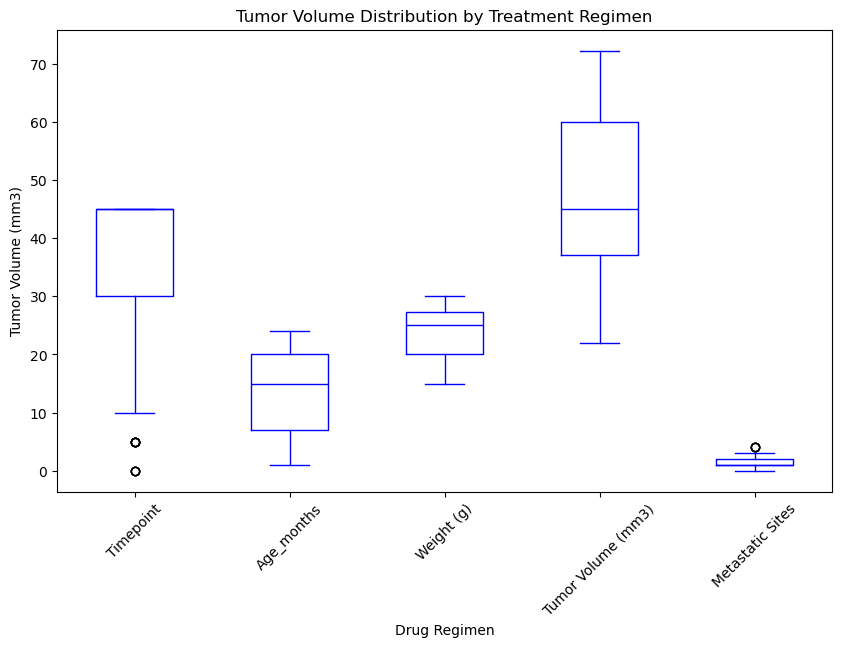

In [17]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
final_tumor_volumes.plot(kind='box', figsize=(10, 6), color='blue', grid=False)

plt.title("Tumor Volume Distribution by Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")

plt.xticks(rotation=45)
plt.show()

## Line and Scatter Plots

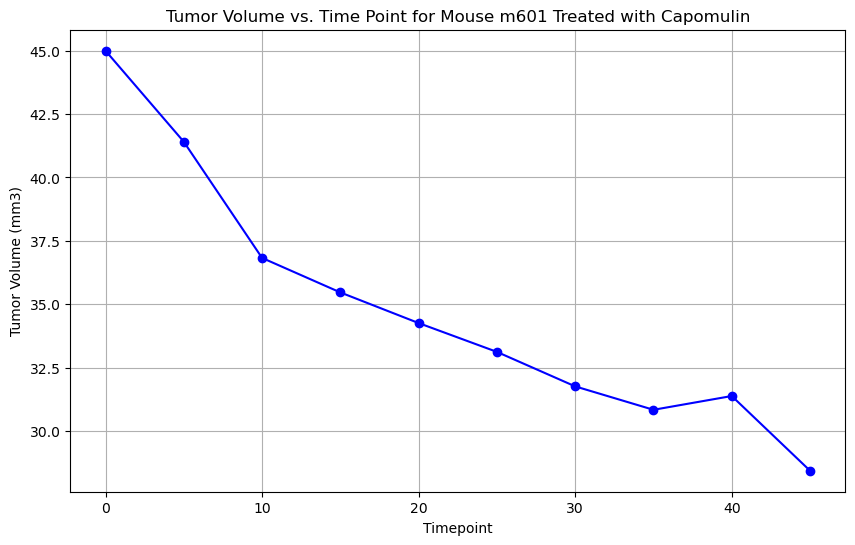

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Replace with the actual mouse ID you want to analyze
mouse_id = 'm601'  
capomulin_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id)]

plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='b')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

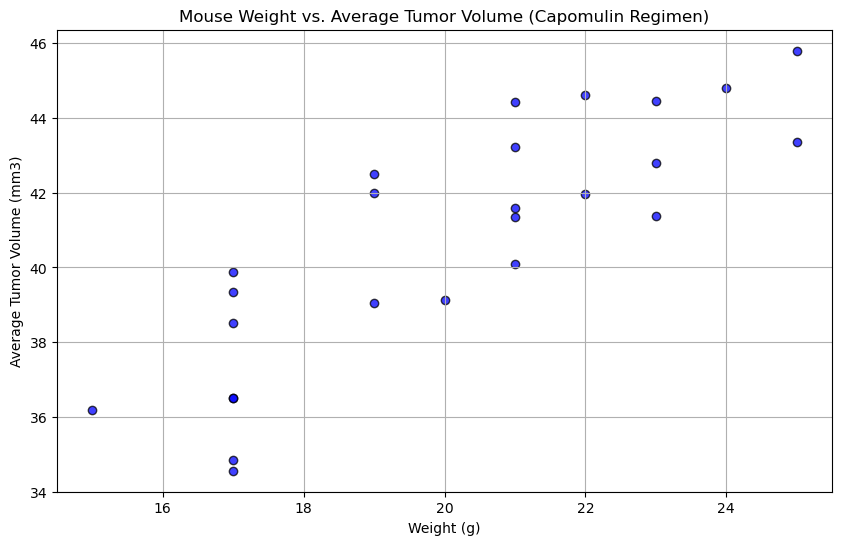

In [57]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

mouse_weights = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
capomulin_summary = pd.merge(mouse_weights, average_tumor_volume, on='Mouse ID')

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_summary['Weight (g)'], capomulin_summary['Tumor Volume (mm3)'], color='blue', edgecolor='black', alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()




## Correlation and Regression

Correlation coefficient: 0.84
Regression line equation: y = 0.95x + 21.55


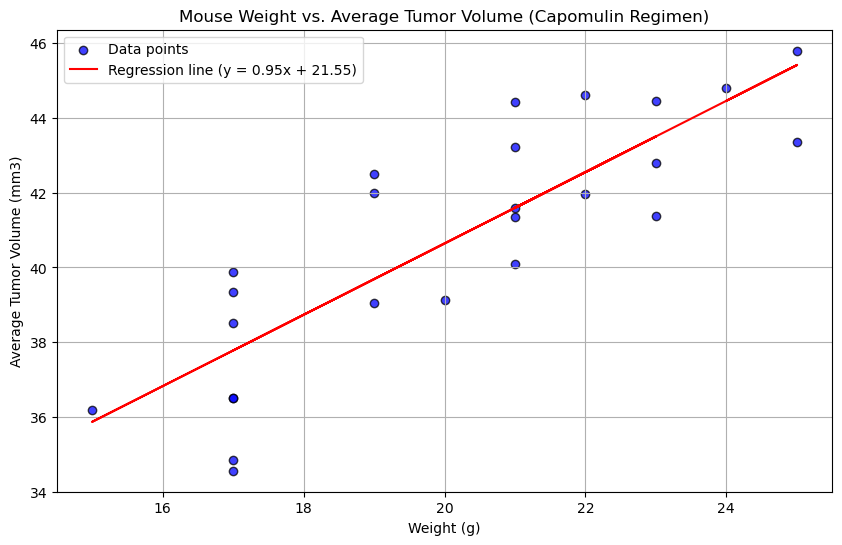

In [73]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

mouse_weights = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
capomulin_summary = pd.merge(mouse_weights, average_tumor_volume, on='Mouse ID')

x = capomulin_summary['Weight (g)']
y = capomulin_summary['Tumor Volume (mm3)']

correlation_coefficient, p_value = stats.pearsonr(x, y)
print(f"Correlation coefficient: {correlation_coefficient:.2f}")


x = x.values.reshape(-1, 1)  
y = y.values
model = LinearRegression()
model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_
print(f"Regression line equation: y = {slope:.2f}x + {intercept:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_summary['Weight (g)'], capomulin_summary['Tumor Volume (mm3)'], color='blue', edgecolor='black', alpha=0.75, label='Data points')
plt.plot(x, model.predict(x), color='red', label=f'Regression line (y = {slope:.2f}x + {intercept:.2f})')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()

